In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


In [119]:
# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [120]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [121]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [123]:
# set up lists to hold reponse info
lat = []
lgn=[]
temp = []
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Max_Temp=[]
Wind_Speed=[]
ciudad=[]
n=0
print("Inicio de Procesamiento de Datos")
print("--------------------------------")

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        ciudad.append(response["name"])
        lat.append(response['coord']['lat'])
        lgn.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Cloudiness.append(response['clouds']['all'])
        Humidity.append(response['main']['humidity'])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Wind_Speed.append(response["wind"]["speed"])
        print("Processing Record "+str(n)+" "+response["name"])
        n=n+1
    except:
        pass
        print("City not found. Skipping...")


Inicio de Procesamiento de Datos
--------------------------------
Processing Record 0 Rikitea
Processing Record 1 Tiksi
Processing Record 2 Muscatine
Processing Record 3 Oda
Processing Record 4 Tuktoyaktuk
Processing Record 5 Kaitangata
Processing Record 6 Llanes
Processing Record 7 Atuona
Processing Record 8 Punta Arenas
Processing Record 9 Hermanus
Processing Record 10 Barrow
City not found. Skipping...
Processing Record 11 Bambous Virieux
Processing Record 12 Tasiilaq
Processing Record 13 Torbay
Processing Record 14 Yar-Sale
Processing Record 15 Namatanai
Processing Record 16 New Norfolk
Processing Record 17 Cromarty
Processing Record 18 Kurilsk
City not found. Skipping...
Processing Record 19 Longyearbyen
City not found. Skipping...
Processing Record 20 Bredasdorp
Processing Record 21 Bucerias
Processing Record 22 Busselton
Processing Record 23 George Town
Processing Record 24 Butaritari
Processing Record 25 Saint-Philippe
Processing Record 26 Salalah
Processing Record 27 Comodoro 

Processing Record 242 San-Pedro
Processing Record 243 Hudson Bay
Processing Record 244 Awjilah
Processing Record 245 Deniliquin
Processing Record 246 Ahipara
Processing Record 247 Kushima
Processing Record 248 Pedernales
City not found. Skipping...
Processing Record 249 Yarmouth
Processing Record 250 Tuatapere
City not found. Skipping...
Processing Record 251 Naze
Processing Record 252 Lompoc
Processing Record 253 Rawson
Processing Record 254 Antalaha
Processing Record 255 Portland
Processing Record 256 Nabire
Processing Record 257 Henties Bay
Processing Record 258 Moranbah
City not found. Skipping...
Processing Record 259 Kyzyl-Suu
Processing Record 260 Berlevag
Processing Record 261 Paamiut
Processing Record 262 Puerto Santander
Processing Record 263 Grand Gaube
Processing Record 264 Mabaruma
Processing Record 265 Rorvik
Processing Record 266 Bonavista
Processing Record 267 Ribeira Grande
Processing Record 268 Saskylakh
Processing Record 269 Ippy
Processing Record 270 Borba
Processin

Processing Record 488 Perelyub
Processing Record 489 El Sauzal de Rodriguez
Processing Record 490 Evensk
Processing Record 491 Atlantic City
Processing Record 492 Roberval
Processing Record 493 Savonlinna
Processing Record 494 Dubbo
Processing Record 495 Valparaiso
Processing Record 496 Kaeo
Processing Record 497 Mahon
Processing Record 498 Kardamena
Processing Record 499 Bodrum
Processing Record 500 Omboue
Processing Record 501 Shenkursk
Processing Record 502 Teberda
Processing Record 503 Hayden
Processing Record 504 Wajima
Processing Record 505 San Patricio
Processing Record 506 Kuusamo
Processing Record 507 Tupiza
Processing Record 508 Murgab
Processing Record 509 Taoudenni
Processing Record 510 Mnogovershinnyy
Processing Record 511 Agde
Processing Record 512 Abha
Processing Record 513 Gizo
Processing Record 514 Houma
Processing Record 515 Poltavka
Processing Record 516 Yaqui
Processing Record 517 Sterling
Processing Record 518 Araci
Processing Record 519 Vangaindrano
Processing Rec

In [124]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": ciudad,
    "Cloudiness":Cloudiness,
    "Country":Country,
    "Date":Date,
    "Humidity":Humidity,
    "lat": lat,
    "lon": lgn,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_Speed
}
weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv(output_data_file)

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,lat,lon,Max Temp,Wind Speed
0,Rikitea,100,PF,1579562191,76,-23.12,-134.97,25.79,4.06
1,Tiksi,2,RU,1579561988,91,71.69,128.87,-32.78,1.73
2,Muscatine,1,US,1579562192,78,41.47,-91.13,-7.00,2.10
3,Oda,75,JP,1579562102,56,35.18,132.50,7.00,4.60
4,Tuktoyaktuk,75,CA,1579562192,74,69.45,-133.04,-30.00,1.50


In [125]:
fecha=Date[3]
fecha=pd.to_datetime(fecha,unit='s')

fecha

Timestamp('2020-01-20 23:15:02')

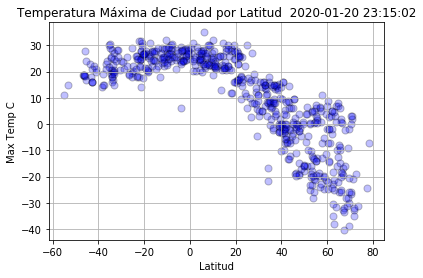

In [126]:
plt.scatter(weather_data["lat"],weather_data["Max Temp"], marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.25)
plt.title("Temperatura Máxima de Ciudad por Latitud  "+str(fecha))
plt.xlabel("Latitud")
plt.ylabel("Max Temp C")
plt.grid()
plt.savefig("Tempvslat.png")

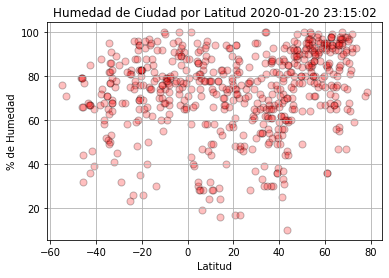

In [127]:
plt.scatter(weather_data["lat"],weather_data["Humidity"], marker="o", facecolors="red", edgecolors="black",
            s=50, alpha=0.25)
plt.title("Humedad de Ciudad por Latitud "+str(fecha))
plt.xlabel("Latitud")
plt.ylabel("% de Humedad")
plt.grid()
plt.savefig("humedadvslat.png")

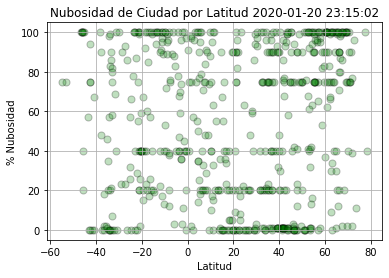

In [128]:
plt.scatter(weather_data["lat"],weather_data["Cloudiness"], marker="o", facecolors="green", edgecolors="black",
            s=50, alpha=0.25)
plt.title("Nubosidad de Ciudad por Latitud "+str(fecha))
plt.xlabel("Latitud")
plt.ylabel("% Nubosidad")
plt.grid()
plt.savefig("nubosidadvslat.png")

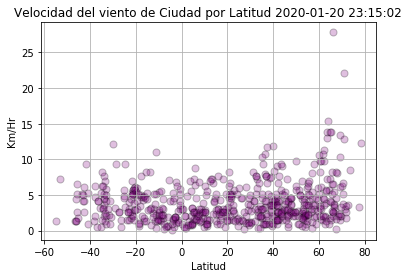

In [129]:
plt.scatter(weather_data["lat"],weather_data["Wind Speed"], marker="o", facecolors="purple", edgecolors="black",
            s=50, alpha=0.25)
plt.title("Velocidad del viento de Ciudad por Latitud "+str(fecha))
plt.xlabel("Latitud")
plt.ylabel("Km/Hr")
plt.grid()
plt.savefig("vientovslat.png")

In [130]:
# Separamos emisferio norte y emisferio sur
emisferio_norte =weather_data.loc[weather_data["lat"] > 0, :]
emisferio_sur=weather_data.loc[weather_data["lat"] <= 0, :]




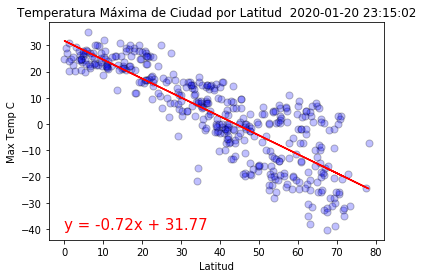

The r-squared is :-0.8432608698328474


<Figure size 432x288 with 0 Axes>

In [131]:
# Hemisferio Norte regresion lineal de Temp vs Latitud
x_values = emisferio_norte["lat"]
y_values = emisferio_norte["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",s=50, alpha=0.25)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-40),fontsize=15,color="red")
plt.title("Temperatura Máxima de Ciudad por Latitud  "+str(fecha))
plt.xlabel("Latitud")
plt.ylabel("Max Temp C")
plt.show()
print("The r-squared is :"+str(rvalue))
plt.savefig("norte_tempvslat.png")

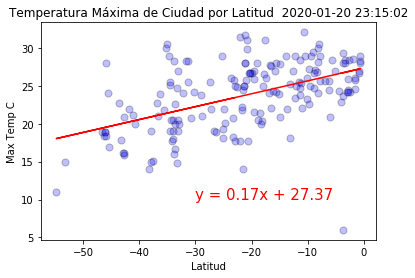

The r-squared is :0.5062343361628232


<Figure size 432x288 with 0 Axes>

In [132]:
# Hemisferio Sur regresion lineal de Temp vs Latitud
x_values = emisferio_sur["lat"]
y_values = emisferio_sur["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",s=50, alpha=0.25)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.title("Temperatura Máxima de Ciudad por Latitud  "+str(fecha))
plt.xlabel("Latitud")
plt.ylabel("Max Temp C")
plt.show()
print("The r-squared is :"+str(rvalue))
plt.savefig("sur_tempvslat.png")

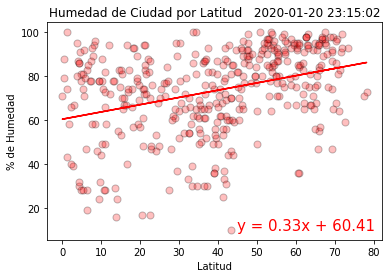

The r-squared is :0.3446029313593869


<Figure size 432x288 with 0 Axes>

In [133]:
# Hemisferio Norte regresion lineal de Humedad vs Latitud
x_values = emisferio_norte["lat"]
y_values = emisferio_norte["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black",s=50, alpha=0.25)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title("Humedad de Ciudad por Latitud   "+str(fecha))
plt.xlabel("Latitud")
plt.ylabel("% de Humedad")
plt.show()
print("The r-squared is :"+str(rvalue))
plt.savefig("norte_humedad.png")

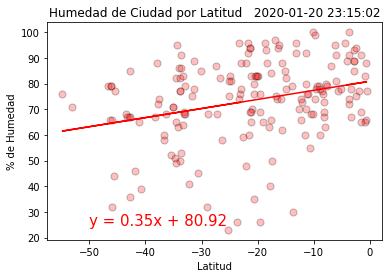

The r-squared is :0.29629420109898214


<Figure size 432x288 with 0 Axes>

In [134]:
# Hemisferio Sur regresion lineal de Humedad vs Latitud
x_values = emisferio_sur["lat"]
y_values = emisferio_sur["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="red", edgecolors="black",s=50, alpha=0.25)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.title("Humedad de Ciudad por Latitud   "+str(fecha))
plt.xlabel("Latitud")
plt.ylabel("% de Humedad")
plt.show()
print("The r-squared is :"+str(rvalue))
plt.savefig("sur_humedad.png")

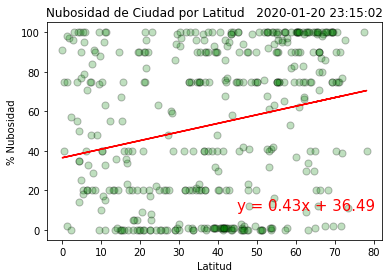

The r-squared is :0.23023106423787978


<Figure size 432x288 with 0 Axes>

In [135]:
# Hemisferio Norte regresion lineal de nubosidad vs Latitud
x_values = emisferio_norte["lat"]
y_values = emisferio_norte["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black",s=50, alpha=0.25)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title("Nubosidad de Ciudad por Latitud   "+str(fecha))
plt.xlabel("Latitud")
plt.ylabel("% Nubosidad")
plt.show()
print("The r-squared is :"+str(rvalue))
plt.savefig("norte_nubosidad.png")

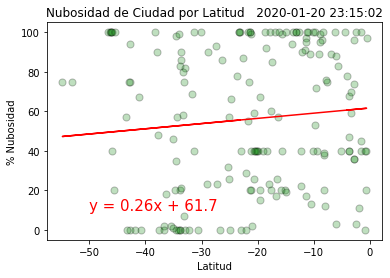

The r-squared is :0.09733850838820479


<Figure size 432x288 with 0 Axes>

In [136]:
# Hemisferio Sur regresion lineal de nubosidad vs Latitud
x_values = emisferio_sur["lat"]
y_values = emisferio_sur["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black",s=50, alpha=0.25)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title("Nubosidad de Ciudad por Latitud   "+str(fecha))
plt.xlabel("Latitud")
plt.ylabel("% Nubosidad")
plt.show()
print("The r-squared is :"+str(rvalue))
plt.savefig("sur_nubosidad.png")

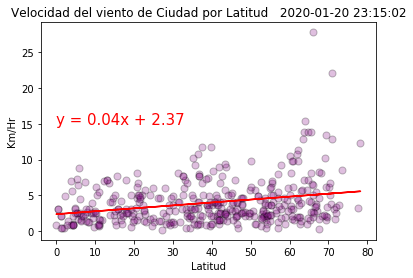

The r-squared is :0.26748390514224435


<Figure size 432x288 with 0 Axes>

In [137]:
# Hemisferio Norte regresion lineal de velocidad del viento vs Latitud
x_values = emisferio_norte["lat"]
y_values = emisferio_norte["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="purple", edgecolors="black",s=50, alpha=0.25)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,15),fontsize=15,color="red")
plt.title("Velocidad del viento de Ciudad por Latitud   "+str(fecha))
plt.xlabel("Latitud")
plt.ylabel("Km/Hr")
plt.show()
print("The r-squared is :"+str(rvalue))
plt.savefig("norte_viento.png")

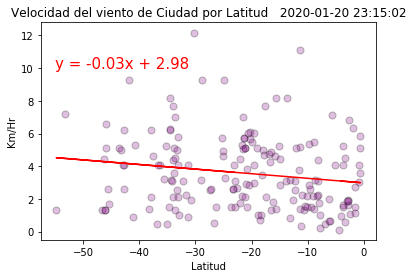

The r-squared is :-0.166891396116746


<Figure size 432x288 with 0 Axes>

In [138]:
# Hemisferio Sur regresion lineal de velocidad del viento vs Latitud
x_values = emisferio_sur["lat"]
y_values = emisferio_sur["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="purple", edgecolors="black",s=50, alpha=0.25)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.title("Velocidad del viento de Ciudad por Latitud   "+str(fecha))
plt.xlabel("Latitud")
plt.ylabel("Km/Hr")
plt.show()
print("The r-squared is :"+str(rvalue))
plt.savefig("sur_viento.png")

In [139]:
len(emisferio_norte),len(emisferio_sur),len(weather_data)


(408, 177, 585)